# NumPy: Applications & Considerations for Statistics & Machine Learning

## Hypothesis Testing

In [1]:
import numpy as np

---

In [99]:
A = np.random.normal(35, 10, 100)
B = np.random.normal(40, 10, 100)

$P(X_A > 30)$

In [106]:
(A > 30).mean()

0.75

$P(X_A > X_B)$

In [101]:
(A > B).mean()

0.31

$P(36 < X_A < 38)$

In [105]:
((36 < A) & (A < 38)).mean()

0.1

---

On a website I offer 5% of customers discount A, compared to 95% of customers without an offer. 

Does discount A increase profits?

$P(Y_A > Y_B)$

In [70]:
popa = np.random.normal(10, 3, 100) # £10 profit +- 3 over 100 sales
popb = np.random.normal(4, 3, 2000) # £9 profit +- 3 over 1000 sales

In [71]:
Ya = np.random.choice(popa, 100)
Yb = np.random.choice(popa, 100)

In [72]:
(Ya > Yb).mean()

0.47

In [74]:
from statistics import mean

pab = []
for _ in range(100):
    Ya = np.random.choice(popa, 100)
    Yb = np.random.choice(popb, 100)
    pab.append( (Ya > Yb).mean() )
    
mean(pab)

0.9389

In [75]:
1 - mean(pab)

0.06110000000000004

$P(Y_A > Y_B) = 0.94$

therefore with confidence/risk, of $6\%$, we prefer $A$

## Machine Learning

## Shape

If we're passing these datasets to sklearn then we need them column-structured, i.e, a matrix. 

In [38]:
M = np.array([
    [20, 30],
    [10, 18],
    [1.0, 1.8]
])

M

array([[20. , 30. ],
       [10. , 18. ],
       [ 1. ,  1.8]])

In [39]:
M.shape

(3, 2)

Ravel (ie., unravel)... 

In [40]:
M.ravel()

array([20. , 30. , 10. , 18. ,  1. ,  1.8])

In [41]:
M.ravel(), M.shape

(array([20. , 30. , 10. , 18. ,  1. ,  1.8]), (3, 2))

## Reshaping Data

Use `.ravel()` to drop all shape (ie., just a seq of numbers).

In [42]:
M.ravel()

array([20. , 30. , 10. , 18. ,  1. ,  1.8])

You can concatenate sequences *as columns* using.. `np.c_[ seq1, seq2, seq2 ...]`

In [43]:
x1 = [1, 2, 3]
x2 = [3, 4, 5]

np.c_[ x1, x2 ] # concatenate

array([[1, 3],
       [2, 4],
       [3, 5]])

In [44]:
M.reshape(2, 3)

array([[20. , 30. , 10. ],
       [18. ,  1. ,  1.8]])

In [45]:
M.reshape(6, -1)

array([[20. ],
       [30. ],
       [10. ],
       [18. ],
       [ 1. ],
       [ 1.8]])

In [46]:
M.reshape(-1, 6)

array([[20. , 30. , 10. , 18. ,  1. ,  1.8]])

### Reshaping Methods

Join along a row, at the end...

In [55]:
np.hstack((x1, x2))

array([1, 2, 3, 3, 4, 5])

Stack rows into columns... forming columns by *stacking* rows...

In [56]:
np.vstack((x1, x2))

array([[1, 2, 3],
       [3, 4, 5]])

Join rows into columns...

In [57]:
np.column_stack((x1, x2)) # np.c_[ x1, x2  ]

array([[1, 3],
       [2, 4],
       [3, 5]])

In [58]:
M.shape

(3, 2)

In [59]:
M.reshape((6,))

array([20. , 30. , 10. , 18. ,  1. ,  1.8])

In [60]:
M.ravel() # flatten (ravel means unravel which means flatten)

array([20. , 30. , 10. , 18. ,  1. ,  1.8])

In [61]:
M.reshape((2, 3))

array([[20. , 30. , 10. ],
       [18. ,  1. ,  1.8]])

In [62]:
M.reshape((6, 1))

array([[20. ],
       [30. ],
       [10. ],
       [18. ],
       [ 1. ],
       [ 1.8]])

In [63]:
M.reshape((-1, 1)) # -1 means "infer", here then I mean: the dataset M *as* one column

array([[20. ],
       [30. ],
       [10. ],
       [18. ],
       [ 1. ],
       [ 1.8]])

---

Let's simulate a target $y$ via a linear combination of the columns in X, ie., $aX_0 + bX_1 + e$ where the points $e$ are distributed normally,  $e \sim \mathcal{N}(0, 1)$ 

Note the index notation for selecting "all rows, first column" :  `X[:, 0]`

In [130]:
food_g_scale = 750

In [139]:
e = np.random.normal(0, 1, N)
X = np.c_[x_height, x_temp]
y = food_g_scale * (0.01*X[:, 0] + 0.1*X[:, 1] + e) # amount of food they've eaten? 

In [140]:
0.01*X[:, 0] # the first column

array([2.02418062, 1.77166586, 1.71638209, 1.62838955, 1.76481223,
       1.79315626, 1.38004835, 1.85840735, 1.83278362, 1.5864879 ])

In [141]:
0.1*X[:, 1] # the second column

array([1.6       , 1.68888889, 1.77777778, 1.86666667, 1.95555556,
       2.04444444, 2.13333333, 2.22222222, 2.31111111, 2.4       ])

In [142]:
e

array([-0.56846399, -1.12231526, -0.06417173, -1.97495433, -1.60129284,
        0.42337606,  0.50387757, -1.03996044,  1.15225774,  1.68731247])

In [143]:
food_g_scale * (0.01*X[0, 0] * 0.1*X[0, 1]  + e[0])

2002.6687472692688

In [145]:
y[0]

2291.787469955815

### Aside: Operator Polymorphism 

Notice: we have been using ordinary python operators *on* numpy arrays... 

Operators can be "overloaded", ie., their behaviour *replaced*. 

In [47]:
1 + 3

4

In [48]:
int.__add__(1, 3)

4

In [49]:
np.array([1, 2, 3]) + 2

array([3, 4, 5])

In [50]:
np.ndarray.__add__(M, 2)

array([[22. , 32. ],
       [12. , 20. ],
       [ 3. ,  3.8]])

In [51]:
[1, 2, 3][0]

1

In [52]:
list.__getitem__([11, 2, 3], 0)

11

In [53]:
M[0, 0]

20.0

In [54]:
"1".__add__("2")

'12'

# Exercise

* Simulate a dataset with NumPy
    * The X should have a matrix form (features are columns, rows are observations)
    * The y should have a sequential form (ie., no structure)
    * Choose a problem domain (retail, finance, health, ...)
    * Either:
        * Choose a (linear) regression problem 
            * ie., simulate some Xs, simulate a y 
            * include an error term
            * "stands in for" effects from other untracked variables, ie., random variation
        * Classification problem
            * HINT: `np.repeat()` 
    * HINTS:
        * when simulating a `y` your `y` should be generated from your Xs
    * Consider:
        * np.random.normal
        * np.linspace
        * np.array
        * np.arange
        * investigate:
           * np.random.choice
        * EXTRA
           * from sklearn.linear_model import LinearRegression
           * .fit(), .predict() on your simulation
           * investigate np.random.poisson

## Solution: Classification

In [64]:
xa = np.random.normal(10, 1, 10)
xb = np.random.normal(20, 2, 10)

In [65]:
y = (xa > 10) & (xb > 20)

In [66]:
X = np.c_[xa, xb]

In [67]:
y

array([ True, False,  True, False,  True, False, False,  True, False,
       False])

### Solution: Sleep

$X = (x_1, x_2) : (coffees, hours_{awake})$

$y : sleep$


$ x_1 \in [0, 5]$
$ x_2 \in [0, 24]$
$ y \in [0, 12]$


* How common do we think observations in x_1, x_2 are?

In [68]:
x1 = np.random.normal(2, 1, 10)
x2 = np.random.normal(16, 3, 10)
e = np.random.normal(0, 0.1, 10)

y = 6 * (x1/5 + 2*x2/24 + e)

In [69]:
y

array([ 7.83265211, 10.49446353, 11.11660956,  9.47907814, 11.20132736,
        5.72043077, 10.02341825,  8.55860869, 14.7437383 ,  8.65515985])

In [70]:
X = np.c_[ x1, x2 ]

#### Extra

In [71]:
from sklearn.linear_model import LinearRegression

ln = LinearRegression().fit(X, y)
ln.coef_, ln.intercept_

(array([1.65578943, 0.31551151]), 2.058619530791126)

$\hat{y} = \hat{f}(x_1, x_2) = 1.14x_1 + 0.57x_2 - 1$

In [72]:
6 * 1/5

1.2

In [73]:
6 * 2/24

0.5

## EXTRA: Exercise 2

As a strech consider a realworld dataset:

In [3]:
import seaborn as sns

In [4]:
X = sns.load_dataset('tips')[['total_bill', 'size']].values

The `size` column (`1`) *WHERE* the first column (`0`) is more than 30...

In [5]:
X[   X[:, 0] > 30,   1].mean()

3.59375

* What's the average total bill when `2` people have dinner?
* How many observations do we see of a small party paying a large bill?
    * you may interpret "small" and "large"
* Consider other interesting questions... what have you found out?

In [8]:
X[  X[:, 1] == 2  , 0 ].mean()

16.44801282051282

The party size is less than or equal to 2, AND, the total bill *for these sizes* is more than the whole average:

Observations in X where:
* the second col <=2, 
* and where, 
* the first col is more than the mean of the first call

In [10]:
((X[:, 1] <= 2) & (X[:, 0] > X[:, 0].mean())).mean()

0.1598360655737705

In [11]:
df = sns.load_dataset('tips')

Whenever you have a dataframe (ie., pandas), *always* pull data out using `df[]` and `.values` (eg., for sklearn).

If you have raw arrays around outside of pandas (eg., via simulation), then use `.reshape()` if you can, or `np.c_` to combine several together. 

In [22]:
df['total_bill'].values[:5] # keeps the numpy array in-place

array([16.99, 10.34, 21.01, 23.68, 24.59])

In [21]:
df['total_bill'].tolist()[:5] # converts to python list

[16.99, 10.34, 21.01, 23.68, 24.59]

In [17]:
df[['total_bill']].values[:5]

array([[16.99],
       [10.34],
       [21.01],
       [23.68],
       [24.59]])

In [ ]:
np.c_[df['total_bill'].values]

# Appendix

## Data Generation & Simluation Methods

In [113]:
dir(np.random)

['BitGenerator',
 'Generator',
 'MT19937',
 'PCG64',
 'Philox',
 'RandomState',
 'SFC64',
 'SeedSequence',
 '__RandomState_ctor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bit_generator',
 '_bounded_integers',
 '_common',
 '_generator',
 '_mt19937',
 '_pcg64',
 '_philox',
 '_pickle',
 '_sfc64',
 'absolute_import',
 'beta',
 'binomial',
 'bytes',
 'chisquare',
 'choice',
 'default_rng',
 'dirichlet',
 'division',
 'exponential',
 'f',
 'gamma',
 'geometric',
 'get_state',
 'gumbel',
 'hypergeometric',
 'laplace',
 'logistic',
 'lognormal',
 'logseries',
 'mtrand',
 'multinomial',
 'multivariate_normal',
 'negative_binomial',
 'noncentral_chisquare',
 'noncentral_f',
 'normal',
 'pareto',
 'permutation',
 'poisson',
 'power',
 'print_function',
 'rand',
 'randint',
 'randn',
 'random',
 'random_integers',
 'random_sample',
 'ranf',
 'rayleigh',
 'sample',
 'seed',
 'set_state',
 'shuffle',

I want a non-random distribution of points, equally spaced from `low` to `high`.

In [114]:
np.linspace(20, 30, 10) # n_equally_spaced_points()

array([20.        , 21.11111111, 22.22222222, 23.33333333, 24.44444444,
       25.55555556, 26.66666667, 27.77777778, 28.88888889, 30.        ])

I want a random distribution of points equally-like across `low` to `high`. 

In [115]:
np.random.uniform(20, 30, 10)

array([21.95956462, 25.49745862, 28.54995718, 23.1287232 , 21.74631115,
       20.22913212, 27.05707005, 22.48164397, 22.39562702, 26.45250956])

### Bernoulli for Discrete Variables

Simulating data with a bernoulli distribution: a distribution *entirely determined* by one parameter, $p$ which is the probablity of one of two possible event. 

A bernouli distribution is a probability mass function (ie., its for a discrete variable). It can therefore be used to simulate classes/categories/labels for classification. 

NB. Binomial distribution = multiple outcomes; a special case is the *bernoulli* distribution which is two-class. 

In [116]:
outcomes = [-1, +1]  # LOAN REJECT | LOAN APPROVAL
# outcomes = [-1, 0, +1] # REJECT / RETRY / APPROVE

trials = 1000 # 1000 applications
p_outcomes = [0.05, 0.95]

applications = np.random.choice(outcomes, trials, p=p_outcomes)

uniq_events, (freq_a, freq_r) = np.unique(applications, return_counts=True)

freq_a/(freq_a + freq_r)

0.039

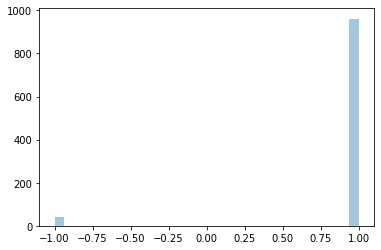

In [117]:
import seaborn as sns

sns.distplot(applications, kde=False);

### Poisson Distribution

The poisson distribution describes events which have a interarrival time (ie., a gap in time between their occurance). Since there is a probabilitistic *rate* of occurance, events will, eg., overlap -- eg., two busses arrival at the same time; or entirely fail to occur on the expected arrival time. 

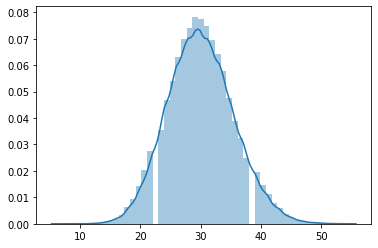

In [118]:
arrival_interval = 30 # eg., seconds

sns.distplot(np.random.poisson(arrival_interval, 100000));

## Simulation & Modelling

Let's build a simulation to approximate the titanic dataset..

In [14]:
import numpy as np

In [15]:
import seaborn as sns

df = sns.load_dataset('titanic').dropna()
df['survived'].mean()

0.6758241758241759

In [16]:
df['age'].mean(), df['fare'].mean()

(35.62318681318681, 78.91973516483515)

In [17]:
df.loc[df['survived'] == 1, 'age'].mean(),
df.loc[df['survived'] == 1, 'fare'].mean()

85.82110650406503

In [18]:
x_age = np.random.normal(36, 15, 10_000)
x_fare = abs(np.random.normal(75, 75, 10_000))
yhat = ((x_age <= 33) | (x_fare <= 85)).astype(int)

The simulation:

* $X_{age} \sim \mathcal{N}(\mu,\,\sigma^{2})$
* $X_{fare} \sim \mathcal{N}(\mu,\,\sigma^{2})$
* $y = 1 \,\, if (x_{age}, x_{fare}) \dots$

In [19]:
(x_age < 30).astype(int)

array([0, 1, 0, ..., 0, 0, 0])

In [21]:
yhat.sum() / len(yhat)

0.7301

In [22]:
yhat.mean()

0.7301

In [23]:
(df['survived'].mean() - yhat.mean())**2

0.0029458650899649723

In [24]:
yhat.mean()

0.7301

## Cut Outs

In [37]:
temp_start = 16
temp_end = 24
sensor_sample_rate = N # eg., simulating a recording each minute over an hour

x_temp = np.linspace(temp_start, temp_end, sensor_sample_rate) # linear space = linear-sequence set = points equidistant in a range 
x_temp[:5]

array([16.        , 16.88888889, 17.77777778, 18.66666667, 19.55555556])